# First step
* Started with importing pandas, madplotlib and read the csv dataset file
* The data from the Dataset will help me find out what the avrage salary you should get depending on for example what country your in or how many years experience you got.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

# Second step (getting the first 5 Rows)
* df = dataframe
* df.head pulls the first 5 Rows so I can se what im cleaning.
* EdLevel = educational level, YearsCodePro = numbers of years as a profesional coder, Employment = employment status ConvertedCompYearly = salary

In [11]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


## Renamed ConvertedCompYearly to Salary

In [ ]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

# Third step
* I only want data that from the people who added their salary.
* Therefore I have to remove the data from salary cloumn that sais NaN

In [13]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


# fourth step
* Need to look at the data so I can clean it more

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


* Now I need to remove all the rows where to columns does'nt contain any numbers

In [15]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

# Fifth step
* Now I only want to keep the data from the people who worked full-time

In [16]:
df = df[df["Employment"]== "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


# Sixth step (Cleaning country data)
* To do this I need to pull the country data

In [17]:
df["Country"].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

* Now I need to remove all countries that have only submitted data from 1 person because it will confuse the model otherwise.
* To do this I will have to create a function wich contains a for loop

In [20]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map

## How the function works
* If the number of samples we get from the data is greater than or equal to the cutoff value the data will be used.
* If its not greater or equal to the cutoff value it will be put in a new categorie called "other".

# Seventh step
* executing the function
* The cutoff value will be 100

In [ ]:
country_map = shorten_categories(df.Country.value_counts(), 100)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

# eighth step (inspecting salary range)
* To do this I will plot salary against the country

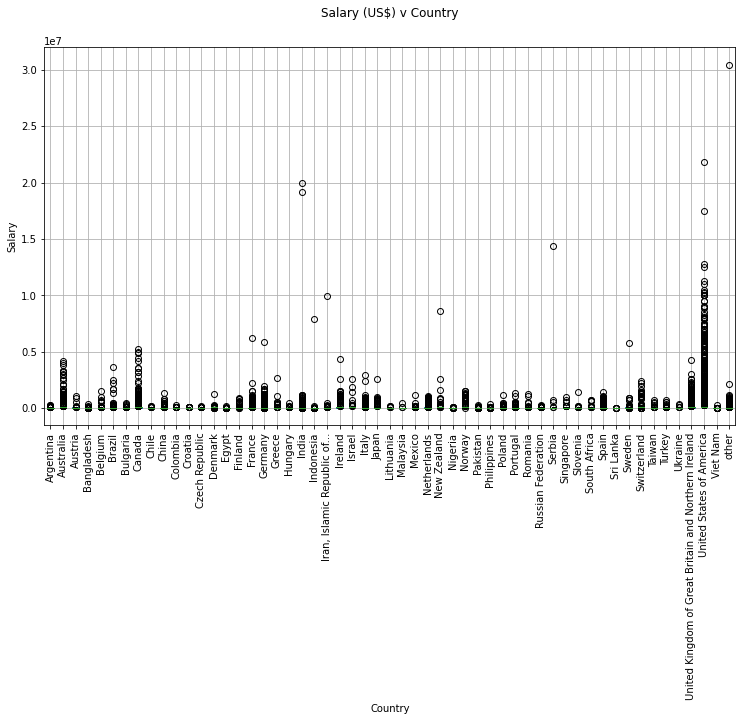

In [27]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

* This is a boxplot. The boxplot shows salaries up to 3 million US$ but we only want to keep the salary data that goes to 250 000 US$.
* I'm going to set a cap of 250 000 US$ because salaries above that is not normal so it would probably confuse the learning model if I kept it in.
* I will also only keep salaries that are above 10 000 US$

## Cleaning the boxplot data
* max salary 250K US$
* lowest salary 10k US$

In [28]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]

* to be able to look at the data again with these new salary values I need to use the same boxplot again

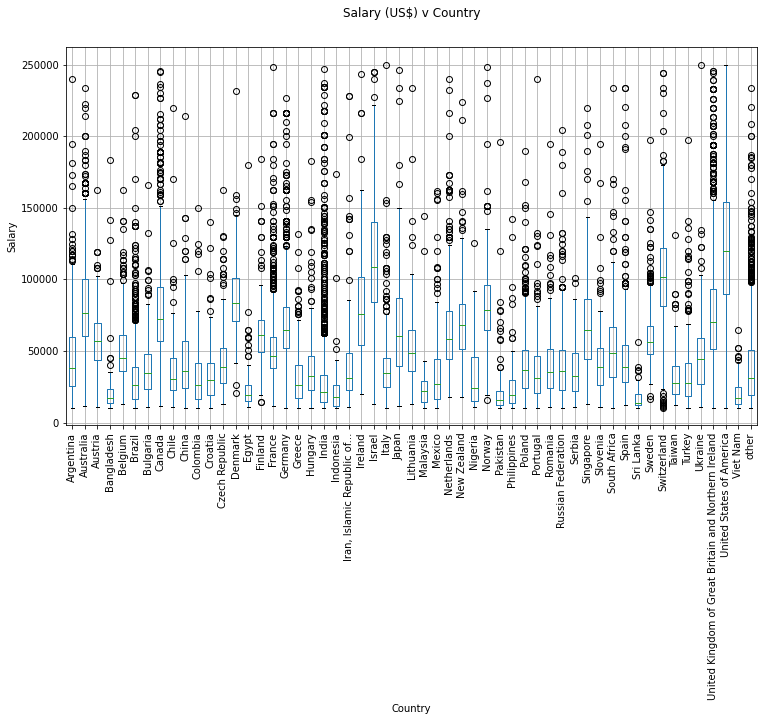

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) v Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

# Ninth step (Cleaning YearsCodePro data)
* First I will inspect the data

In [30]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '1', '12', '8', '17', '14', '26', '34', '11', '25',
       '24', '7', '22', '13', '9', '20', '23', '39', '27', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

* We get the data as a string value but I will convert it to a float.
* If it sais less than 1 year I will change it to 0.5 and for more than 50 years I will just change it to 50
* To be able to do this I have to create another function

In [31]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

# Tenth step EdLevel (education level)
* For the EdLevel data we will do a similar thing as we did for the YearsCodePro data

In [32]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

* From the EdLevel data I will keep the masters degree data and bachelors degree data.
* If it's a professional degree or a doctoral degree I will call it Post grad.
* All the other data values will be called less than a bachelors

## The function the clean and rename the data

In [33]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [34]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

# Eleventh step
* Need to transform the string values to a unique value(number) that the model can understand because the model don't work with strings.
* To transform the data I will have to import labelencoder from sklearn.preprocessing.